## Practical 4

## Multiclass classification on reuters dataset

In [4]:
# Multiclass classification
import numpy as np
import keras
import cv2
import matplotlib.pyplot as plt
from keras.utils.np_utils import to_categorical
import tensorflow as tf

In [5]:
from keras.datasets import reuters

(data_train, labels_train), (data_test, labels_test) = tf.keras.datasets.reuters.load_data(path='reuters.npz', num_words=10000, 
                                                                                           skip_top=0, maxlen=None, 
                                                                                           test_split=0.2, seed=113, 
                                                                                           start_char=1, oov_char=2, 
                                                                                           index_from=3)


In [7]:
print(len(data_train))
print(len(data_test))
# checking first sample
print(data_train[0])

8982
2246
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [9]:
# Decoding the data
word_index = tf.keras.datasets.reuters.get_word_index()

# Generate integer to word mapping
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# Indices are offset by 3 because 0,1,2 are reserved for "padding", "start of response " and " "
decoded_review = ' '.join((reverse_word_index.get(i-3, "?") for i in data_train[0]))
print(decoded_review)

? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


We cannot feed integer sequences to the neural network. Therefore we perform One-Hot Encoding. The 10,000 unique elements in our training and testing data. Vectorizing results in 2D tensors with input tensor shape (8982,10000) and test input tensor of shape (2246,10000).

In [10]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

In [11]:
x_train = vectorize_sequences(data_train)
x_test = vectorize_sequences(data_test)

In [12]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1
    return results
# One hot encoding can also be performed using to_categorical function

In [13]:
y_train = to_categorical(labels_train)
y_test = to_categorical(labels_test)

In [14]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(8982, 10000)
(8982, 46)
(2246, 10000)
(2246, 46)


In [15]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(64, activation='relu', input_shape=(10000, )))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(46, activation='softmax'))

In [16]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:

x_val = x_train[:1000 ]
partial_x_train = x_train[1000:]
y_val = y_train[:1000 ]
partial_y_train = y_train[1000:]

print("x_val ", x_val.shape)
print("y_val ", y_val.shape)

print("partial_x_train ", partial_x_train.shape)
print("partial_y_train ", partial_y_train.shape)

x_val  (1000, 10000)
y_val  (1000, 46)
partial_x_train  (7982, 10000)
partial_y_train  (7982, 46)


In [18]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 10s 350ms/step - loss: 3.1508 - accuracy: 0.4001 - val_loss: 1.7194 - val_accuracy: 0.6430
Epoch 2/20
16/16 [==============================] - 0s 30ms/step - loss: 1.4755 - accuracy: 0.6946 - val_loss: 1.2812 - val_accuracy: 0.7190
Epoch 3/20
16/16 [==============================] - 0s 30ms/step - loss: 1.0565 - accuracy: 0.7798 - val_loss: 1.1246 - val_accuracy: 0.7530
Epoch 4/20
16/16 [==============================] - 0s 29ms/step - loss: 0.8303 - accuracy: 0.8267 - val_loss: 1.0264 - val_accuracy: 0.7820
Epoch 5/20
16/16 [==============================] - 0s 30ms/step - loss: 0.6494 - accuracy: 0.8647 - val_loss: 0.9544 - val_accuracy: 0.8010
Epoch 6/20
16/16 [==============================] - 1s 33ms/step - loss: 0.4994 - accuracy: 0.8983 - val_loss: 0.9220 - val_accuracy: 0.8060
Epoch 7/20
16/16 [==============================] - 1s 34ms/step - loss: 0.4172 - accuracy: 0.9141 - val_loss: 0.9223 - val_accuracy: 0.8040
Epoch 8/20


In [19]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


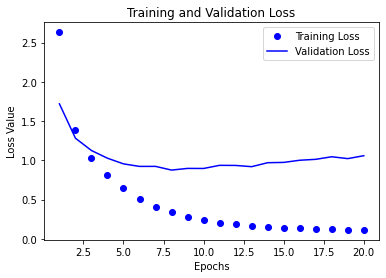

In [20]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values)+1)

plt.plot(epochs, loss_values, 'bo', label='Training Loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation Loss')

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()
plt.show()

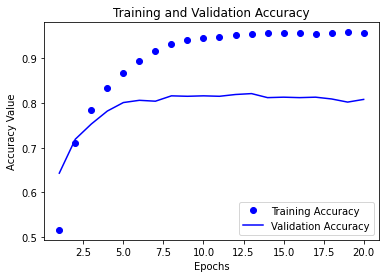

In [21]:
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

epochs = range(1, len(loss_values)+1)

plt.plot(epochs, acc_values, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation Accuracy')

plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy Value')
plt.legend()
plt.show()

In [28]:
# We observe that minimum validation loss and maximum validation accuracy is achieved at around 10 epochs. Retraining our model.

# Model definition
model = keras.models.Sequential()
model.add(keras.layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(46, activation='softmax'))

# Compilation
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# Training
model.fit(partial_x_train, partial_y_train, epochs=9, batch_size=128, validation_data=(x_val, y_val))

Epoch 1/9
63/63 [==============================] - 2s 19ms/step - loss: 2.5150 - accuracy: 0.5112 - val_loss: 1.2597 - val_accuracy: 0.7210
Epoch 2/9
63/63 [==============================] - 1s 17ms/step - loss: 1.0328 - accuracy: 0.7789 - val_loss: 1.0179 - val_accuracy: 0.7790
Epoch 3/9
63/63 [==============================] - 1s 20ms/step - loss: 0.6982 - accuracy: 0.8521 - val_loss: 0.8908 - val_accuracy: 0.8080
Epoch 4/9
63/63 [==============================] - 1s 19ms/step - loss: 0.4560 - accuracy: 0.9045 - val_loss: 0.8596 - val_accuracy: 0.8260
Epoch 5/9
63/63 [==============================] - 1s 20ms/step - loss: 0.3233 - accuracy: 0.9294 - val_loss: 0.9010 - val_accuracy: 0.8120
Epoch 6/9
63/63 [==============================] - 1s 17ms/step - loss: 0.2341 - accuracy: 0.9435 - val_loss: 0.9551 - val_accuracy: 0.8040
Epoch 7/9
63/63 [==============================] - 1s 20ms/step - loss: 0.1816 - accuracy: 0.9570 - val_loss: 0.9750 - val_accuracy: 0.7990
Epoch 8/9
63/63 [===

In [29]:
results = model.evaluate(x_test, y_test)
print(results)

71/71 [==============================] - 0s 3ms/step - loss: 1.1700 - accuracy: 0.7854
[1.1699519157409668, 0.7853962779045105]


batch size =512, epochs=9 accuracy =0.78272

batch size =256, epochs=9 accuracy =0.76758

batch size =128, epochs=9 accuracy =0.78539